# Домашнее задание 2. Классификация, детекция.

Оценка за часть 1 и часть 2 в этом дз -- по 5 баллов.

## Часть 1. Классификация

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в датасете есть. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train и val, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат собственно сами изображения.
 
__Задание__. Добейтесь accuracy **не менее 0.44**. Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи/блогпосты/вопросы на stackoverflow/видосы от (индийских) ютуберов/курсы/подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

В коде ниже необходимо, чтобы код проходил все `assert`'ы.

Необходимо написать функцию `predict` по шаблону ниже. Эта функция принимает на вход модель, даталоадер с валидационнами данными, criterion для подсчёта лосса и device, на котором будут производиться вычисления (определён ниже) и возвращает список лоссов по всем объектам, список из предсказанных классов для каждого объекта из из даталоалера и список из настоящих классов для каждого объекта в даталоадере (и именно в таком порядке).

__Использовать внешние данные для обучения строго запрещено__. Можно использовать предобученные модели из `torchvision`.

__Критерии оценки__: Оценка вычисляется по простой формуле: min(5, 5 * Ваша accuracy / 0.44). Оценка округляется до десятых по арифметическим правилам.

__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать на защите :)
 - Используйте аугментации. Для этого пользуйтесь модулем torchvision.transforms или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - (ещё раз) Можно файнтюнить предобученные модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом ImageFolder), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы отладить код, пробуйте обучаться на маленькой части датасета. Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать гпу. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.
 
Good luck & have fun! :)

In [1]:
import os

In [3]:
!wget https://www.dropbox.com/s/h10l9ibmw9z02zm/dataset.zip?dl=0 -O dataset.zip

--2020-11-25 14:40:03--  https://www.dropbox.com/s/h10l9ibmw9z02zm/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/h10l9ibmw9z02zm/dataset.zip [following]
--2020-11-25 14:40:03--  https://www.dropbox.com/s/raw/h10l9ibmw9z02zm/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf6b27024c2743b49ae9888ff4e.dl.dropboxusercontent.com/cd/0/inline/BD0BkGZvCryoKOADuyyMTiaCIclc7nda6vRDnIQXK0V-hVH2QSSAuB6OO9pXdz5WEEAYWJxl9YCR8EPoI1M491EIi9-XGFSlmpjLyI84q98baUGuPkWGvT0cdLKUljmyvVw/file# [following]
--2020-11-25 14:40:04--  https://ucf6b27024c2743b49ae9888ff4e.dl.dropboxusercontent.com/cd/0/inline/BD0BkGZvCryoKOADuyyMTiaCIclc7nda6vRDnIQXK0V-hVH2QSSAuB6OO9pXdz5WEEAYWJxl9YCR8EPoI1M491EIi9-XGFSlmpjLyI84q98baUGu

In [4]:
!ls

dataset.zip  sample_data


In [5]:
! unzip -q dataset.zip

In [6]:
!rm dataset.zip

In [7]:
!ls dataset/dataset/

train  val


In [8]:
import torch
import torchvision
from torch import nn
from torch.nn import functional as F
import numpy as np
import PIL
from PIL import Image
# You may add any imports you need

class MyDataset(torch.utils.data.Dataset):
    def __init__(self, data_dir, transform=None):
        # YOUR CODE
        self.path = data_dir
        self.transform = transform
        self.img_names = []
        self.img_labels = []
        for classname in sorted(os.listdir(self.path)):
            for img in os.listdir(os.path.join(self.path, classname)):
                self.img_names.append(os.path.join(self.path, classname, img)) # запоминаем все названия картинок в директории в список (для всех директорий классов в директории path)
                self.img_labels.append(int(classname.replace('class_', '')))  # запоминаем название директории (номера класса для каждой из картинок)

    def __getitem__(self, idx):
        # YOUR CODE
        img = self.img_names[idx]
        img = Image.open(img).convert("RGB") # по индексу находим название картинки и считываем ее информацию. Преобразование в rgb необходимо,
                                             # т.к. в ходе экспериментов были найдены не трехканальные картинки
        if self.transform is not None:
            img = self.transform(img)
        return (img, self.img_labels[idx]) # применяем аугментации и возвращаем измененную картинку с номером ее класса


    def __len__(self):
        # YOUR CODE
        return len(self.img_names)

In [9]:
train_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomRotation(10, resample=PIL.Image.BILINEAR),
    torchvision.transforms.ToTensor(), 
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (1, 1, 1)),
])

# для обоих датасетов изменяем размер картинки, добавляем фильтры, отражение, повороты, преобразуем к тензору и нормализуем по приблизительным mean и std
# пробовала добавлять/убирать некоторые методы из списка, в итоге среди перепробованных вариантов лучшее качество получено именно из такой комбинации

val_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor(), 
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (1, 1, 1)),
])
# YOU CAN DEFINE AUGMENTATIONS HERE

train_dataset = MyDataset("./dataset/dataset/train", transform=train_transform)
val_dataset = MyDataset("./dataset/dataset/val", transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET
# OR USE torchvision.datasets.ImageFolder INSTEAD OF MyDataset

In [10]:
# Just very simple checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


In [25]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score

def train_one_epoch(model, train_dataloader, criterion, optimizer):
    global_loss = torch.FloatTensor([0 for i in range(256)])
    accuracy = []
    n = 0
    model.train()

    with tqdm(total=100000) as pr_bar:
        for imgs, labels in train_dataloader: # алгоритм по сути аналогичен всем train алгоритмам которые мы рассматривали с семинаров
            pred = model(imgs)
            loss = criterion(pred, labels)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            n += len(labels)
            global_loss += loss
            accuracy.extend((torch.argmax(pred, dim=-1) == labels).numpy().tolist())
    
            pr_bar.update(len(labels))
        # YOUR CODE
        # TRAIN YOUR MODEL HERE
            if n % 16384 == 0:
                print("\n Качество после {0} батчей: {1}".format(n / 256, np.mean(accuracy)))
                print("Ошибка на трейне: {}".format(int(sum(global_loss) / n)))

    return sum(global_loss) / n, np.mean(accuracy)

def predict(model, val_dataloder, criterion):
    model.eval()
    global_loss = torch.FloatTensor([0, 0, 0, 0])
    losses = []
    accuracy = []
    n = 0
    predicted_classes = []
    true_classes = []
    with torch.no_grad():
        for x_val, y_val in val_dataloader:
            pred = model(x_val)
            loss = criterion(pred, y_val)
            n += len(y_val)
            global_loss += loss
            accuracy.extend((torch.argmax(pred, dim=-1) == y_val).numpy().tolist())
            true_classes.extend(y_val)
            predicted_classes.extend(torch.argmax(pred, dim=-1))
            losses.extend(loss)
    # YOUR CODE
    # predict val_dataloader and print and return the validation accuracy
    # pass

    print("\n Качество на тесте: {1}".format(n / 4, np.mean(accuracy)))
    print("Величина ошибки: {}".format(sum(global_loss) / n))

    return losses, predicted_classes, true_classes


def train(model, train_dataloader, val_dataloader, criterion, optimizer, n_epochs=10, scheduler=None):
    for epoch in range(n_epochs):
        # YOUR CODE
        # Train, evaluate, print accuracy, make a step of scheduler or whatever you want...
        train_one_epoch(model, train_dataloader, criterion=criterion, optimizer=optimizer)
        if epoch % 2 == 0:
            predict(model, val_dataloader, criterion)

In [12]:
torch.manual_seed(1003)

In [13]:
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=256, shuffle=True, num_workers=4)


In [14]:
val_dataloader = torch.utils.data.DataLoader(
    val_dataset, batch_size=4, shuffle=False, num_workers=4)


In [27]:
from torchvision.models import resnet18

model = resnet18(pretrained=True) # в итоге ни изменения в модели, ни выбор оптимизатора не помогли значительно улучшить качество. Поэтому решила попробовать fine-tuning.
# по материалам из семинара, модель resnet18 достаточно быстрая и показывает хорошее качество, поэтому выбрала для начала ее

In [28]:
for param in model.parameters():
    param.requires_grad = False

# поскольку модель уже предобучена, убираем подсчет градиентов по параметрам слоев

In [29]:
model.fc = nn.Linear(512, 200) # заменяем последний полносвязный слой и изменяем кол-во выходных нейронов на количество классов. Его и будем обучать
# суть fine-tuning в данном случае я думаю нет смысла пояснять, если понадобится, отвечу на этот вопрос на защите

In [30]:
optimizer = torch.optim.Adam(model.fc.parameters(), lr=1e-3) # на предыдущих запусках Adam показал себя лучше SGD, начнем с него
criterion = nn.CrossEntropyLoss()

Простой тест на проверку правильности написанного кода

In [19]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(predicted_labels, true_labels)
print("tests passed")

Качество на тесте: 0.0034
Величина ошибки: 5.446625232696533
tests passed


Запустить обучение можно в ячейке ниже.

In [22]:
train(model, train_dataloader, val_dataloader, criterion=criterion, optimizer=optimizer, n_epochs=4) # резких изменений после 2 эпохи не наблюдается, но есть небольшой рост качества и снижение величины ошибки

  0%|          | 0/100000 [00:00<?, ?it/s]

0


 16%|█▋        | 16384/100000 [11:52<1:00:22, 23.08it/s]

Качество после 64.0 батчей: 0.10223388671875
Ошибка на трейне: 4.7241621017456055


 33%|███▎      | 32768/100000 [23:38<48:31, 23.09it/s]

Качество после 128.0 батчей: 0.202880859375
Ошибка на трейне: 4.161929607391357


 49%|████▉     | 49152/100000 [35:08<36:04, 23.49it/s]

Качество после 192.0 батчей: 0.26416015625
Ошибка на трейне: 3.783794641494751


 66%|██████▌   | 65536/100000 [47:12<24:45, 23.19it/s]

Качество после 256.0 батчей: 0.3064727783203125
Ошибка на трейне: 3.5100133419036865


 82%|████████▏ | 81920/100000 [59:02<13:01, 23.13it/s]

Качество после 320.0 батчей: 0.33604736328125
Ошибка на трейне: 3.305213451385498


 98%|█████████▊| 98304/100000 [1:10:55<01:13, 23.09it/s]

Качество после 384.0 батчей: 0.35772705078125
Ошибка на трейне: 3.1524593830108643


  0%|          | 0/100000 [00:00<?, ?it/s]

Качество на тесте: 0.5082
Величина ошибки: 2.1071059703826904
1


 16%|█▋        | 16384/100000 [13:57<1:10:35, 19.74it/s]

Качество после 64.0 батчей: 0.49267578125
Ошибка на трейне: 2.234497547149658


 33%|███▎      | 32768/100000 [27:46<56:49, 19.72it/s]

Качество после 128.0 батчей: 0.498779296875
Ошибка на трейне: 2.2031195163726807


 49%|████▉     | 49152/100000 [41:37<43:08, 19.65it/s]

Качество после 192.0 батчей: 0.5004679361979166
Ошибка на трейне: 2.179039478302002


 66%|██████▌   | 65536/100000 [55:30<29:32, 19.45it/s]

Качество после 256.0 батчей: 0.5020294189453125
Ошибка на трейне: 2.1585140228271484


 82%|████████▏ | 81920/100000 [1:09:26<15:19, 19.66it/s]

Качество после 320.0 батчей: 0.504443359375
Ошибка на трейне: 2.138902187347412


 98%|█████████▊| 98304/100000 [1:23:23<01:22, 20.52it/s]

Качество после 384.0 батчей: 0.5058085123697916
Ошибка на трейне: 2.127941608428955


  0%|          | 0/100000 [00:00<?, ?it/s]

2


 16%|█▋        | 16384/100000 [14:08<1:11:15, 19.55it/s]

Качество после 64.0 батчей: 0.53277587890625
Ошибка на трейне: 1.9898380041122437


 33%|███▎      | 32768/100000 [28:01<57:15, 19.57it/s]

Качество после 128.0 батчей: 0.534942626953125
Ошибка на трейне: 1.9678653478622437


 49%|████▉     | 49152/100000 [41:53<42:49, 19.79it/s]

Качество после 192.0 батчей: 0.5355631510416666
Ошибка на трейне: 1.9594050645828247


 66%|██████▌   | 65536/100000 [55:47<29:15, 19.63it/s]

Качество после 256.0 батчей: 0.536102294921875
Ошибка на трейне: 1.9482804536819458


 82%|████████▏ | 81920/100000 [1:09:44<15:23, 19.57it/s]

Качество после 320.0 батчей: 0.5344970703125
Ошибка на трейне: 1.948735237121582


 98%|█████████▊| 98304/100000 [1:23:38<01:22, 20.50it/s]

Качество после 384.0 батчей: 0.5341389973958334
Ошибка на трейне: 1.9484084844589233


  0%|          | 0/100000 [00:00<?, ?it/s]

Качество на тесте: 0.5638
Величина ошибки: 1.7796238660812378
3


 16%|█▋        | 16384/100000 [14:09<1:11:30, 19.49it/s]

Качество после 64.0 батчей: 0.5498046875
Ошибка на трейне: 1.8569560050964355


 33%|███▎      | 32768/100000 [28:10<57:34, 19.46it/s]

Качество после 128.0 батчей: 0.5504150390625
Ошибка на трейне: 1.8576654195785522


 49%|████▉     | 49152/100000 [41:46<40:45, 20.79it/s]

Качество после 192.0 батчей: 0.5485432942708334
Ошибка на трейне: 1.8599990606307983


 66%|██████▌   | 65536/100000 [54:58<27:36, 20.81it/s]

Качество после 256.0 батчей: 0.548675537109375
Ошибка на трейне: 1.8620299100875854


 82%|████████▏ | 81920/100000 [1:07:52<14:15, 21.12it/s]

Качество после 320.0 батчей: 0.54664306640625
Ошибка на трейне: 1.8656301498413086


 98%|█████████▊| 98304/100000 [1:21:00<01:17, 21.96it/s]

Качество после 384.0 батчей: 0.546661376953125
Ошибка на трейне: 1.8671331405639648


100%|██████████| 100000/100000 [1:22:12<00:00, 20.27it/s]


После всех экспериментов которые вы проделали, выберите лучшую из своих моделей, запустите функцию evaluate. Эта функция должна брать на вход модель и даталоадер с валидационными данными и возврашать accuracy, посчитанную на этом датасете.

In [23]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(true_labels, predicted_labels)
print("Оценка за это задание составит {} баллов".format(min(5, 5*accuracy / 0.44)))

Качество на тесте: 0.5651
Величина ошибки: 1.758678674697876
Оценка за это задание составит 5 баллов


__Ваш отчёт о проделанных экспериментах__: над задачей работала в Google Colab в среде выполнения GPU. Написать весь необходимый код и сделать так, чтобы он работал как надо, получилось достаточно быстро. А вот качества пришлось добиваться долго. Я перепробовала множество комбинаций вариантов аугментаций, оптимизатора и модели. В итоге все составленные вручную модели были недостаточно мощными и показывали низкое качество. Все осложнялось долгим выполнением кода. Все эпохи занимали примерно по 60-70 минут, как у автора задачи получилось достичь цели за 15 минут и в чем такой существенный недостаток моего кода, я пока не смогла понять. С использованием предобученной сети качество в результате значительно возросло. Таким подходом нужного качества получилось добиться уже на 2 попытке. С изменением оптимизатора, и аугментаций оно менялось, но на сотые доли. В итоге в ячейках оставила параметры, при которых качество было самым высоким из полученных. Если кратко, лучший оптимизатор из использованных - Adam, fine-tuning дает качество на порядок выше. При выполнении дз пользовалась в первую очередь описанием ошибки под ячейкой кода, иногда приходилось ошибки гуглить. В остальном - изученными материалами лекций, семинаров, просто логикой. И сайтами с документацией или статьями по pytorch, PIL, os и т.д. Их было очень много, даже нет смысла вставлять, к тому же официальные источники и так все знают. Задание понравилось, было интересно, хотя и непросто, и прежде чем добиться результата понадобилось несколько дней. Есть еще несколько вещей, которые я бы добавила в будущем чтобы попробовать повысить качество классификации, но пока существующего результата достаточно.

## Часть 2. Object detection.

В этом задании потребуется обучить детектор фруктов на изображении. Датасет можно скачать [отсюда](https://yadi.sk/d/UPwQB7OZrB48qQ).

In [1]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader

In [2]:
# we will need this library to process the labeling
! pip install xmltodict

In [3]:
!wget https://www.dropbox.com/s/e120wzgzf34tfqx/archive.zip.. -O archive.zip

--2020-11-25 21:08:21--  https://www.dropbox.com/s/e120wzgzf34tfqx/archive.zip..
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/e120wzgzf34tfqx/archive.zip.. [following]
--2020-11-25 21:08:21--  https://www.dropbox.com/s/raw/e120wzgzf34tfqx/archive.zip..
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf58a0edf282642652fbb0bbeb9.dl.dropboxusercontent.com/cd/0/inline/BD4VZht2KorlY7RI4cW3t3_AEQ3dYKKbJehZfw26pw4y0ukv1Lcie23ve5xWzptTdsCBfv5J3D8l5jwIF-t6OfYBWdz4oNNPCDa6o8U1arr9-1ZDppcheYnOsnpl9sZhox8/file# [following]
--2020-11-25 21:08:21--  https://ucf58a0edf282642652fbb0bbeb9.dl.dropboxusercontent.com/cd/0/inline/BD4VZht2KorlY7RI4cW3t3_AEQ3dYKKbJehZfw26pw4y0ukv1Lcie23ve5xWzptTdsCBfv5J3D8l5jwIF-t6OfYBWdz4oNNPCDa6o8U1arr9-1Z

In [4]:
! unzip -q archive.zip

In [5]:
!ls test_zip/

test


In [6]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir 
# без обновления в albumentations возникают ошибки

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-70lauszu
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-70lauszu
     |████████████████████████████████| 952kB 8.7MB/s 
  Created wheel for albumentations: filename=albumentations-0.5.1-cp36-none-any.whl size=72234 sha256=bbc3870a9ac5d80b03cb8df3a8593b066443cd6565a6c17d3775ffb486f8cba6
  Stored in directory: /tmp/pip-ephem-wheel-cache-5d14mc94/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [7]:
import xmltodict, json
import albumentations as A
import random

Датасет мы за вас написали.

In [8]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
import xmltodict
import json
import glob
import cv2
import os
import torchvision
import matplotlib.pyplot as plt
from sklearn.metrics import auc
# add any imports you need

class2tag = {"apple": 1, "orange": 2, "banana": 3}


class FruitDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.images = []
        self.annotations = []
        self.transform = transform
        # self.mean = [0, 0, 0]
        # self.std = [0, 0, 0]
        for annotation in glob.glob(data_dir + "/*xml"):
            image_fname = os.path.splitext(annotation)[0] + ".jpg"
            self.images.append(cv2.cvtColor(cv2.imread(image_fname), cv2.COLOR_BGR2RGB))
            with open(annotation) as f:
                annotation_dict = xmltodict.parse(f.read())
            bboxes = []
            labels = []
            objects = annotation_dict["annotation"]["object"]
            if not isinstance(objects, list):
                objects = [objects]
            for obj in objects:
                bndbox = obj["bndbox"]
                bbox = [bndbox["xmin"], bndbox["ymin"], bndbox["xmax"], bndbox["ymax"]]
                bbox = list(map(int, bbox))
                bboxes.append(torch.tensor(bbox))
                labels.append(class2tag[obj["name"]])
            self.annotations.append(
                {"boxes": torch.stack(bboxes).float(), "labels": torch.tensor(labels)}
            )


        # Дополнение для подсчета среднего и стандартного отклонения по каналам по всей выборке

        # for image in self.images:
        #     for i in range(len(self.mean)):
        #         self.mean[i] += np.mean(image[:, :, i] / 255)
        # self.mean = np.array(self.mean) / len(self.images)
        # print(self.mean)

        # num_pixels = 0
        # for image in self.images:
        #     num_pixels += image[:, :, 0].shape[0] * image[:, :, 0].shape[1]
        #     for i in range(len(self.std)):
        #         self.std[i] += np.sum(((image[:, :, i] / 255) - self.mean[i]) ** 2)

        # self.std = np.array(self.std) / num_pixels
        # self.std = self.std ** 0.5
        # print(self.std)


    def __getitem__(self, i):
        if self.transform:
            # the following code is correct if you use albumentations
            # if you use torchvision transforms you have to modify it =)
            res = self.transform(
                image=self.images[i],
                bboxes=self.annotations[i]["boxes"],
                labels=self.annotations[i]["labels"],
            )
            res['image'] = torch.tensor(res['image'])
            return torch.stack([res["image"][:, :, 0], res["image"][:, :, 1], res["image"][:, :, 2]]), {
                "boxes": torch.tensor(res["bboxes"], dtype=torch.float32),
                "labels": torch.tensor(res["labels"]),
            }
        else:
            return self.images[i], self.annotations[i]

    def __len__(self):
        return len(self.images)

Выпишем кое-какую техническую работу, которая уже была на семинаре.

In [9]:
def intersection_over_union(dt_bbox, gt_bbox):
    """
    Intersection over Union between two bboxes
    :param dt_bbox: list or numpy array of size (4,) [x0, y0, x1, y1]
    :param gt_bbox: list or numpy array of size (4,) [x0, y0, x1, y1]
    :return : intersection over union
    """

    ## TODO YOUR CODE

    intersection_bbox = np.array(
        [
            max(dt_bbox[0], gt_bbox[0]),
            max(dt_bbox[1], gt_bbox[1]),
            min(dt_bbox[2], gt_bbox[2]),
            min(dt_bbox[3], gt_bbox[3]),
        ]
    )

    intersection_area = max(intersection_bbox[2] - intersection_bbox[0], 0) * max(
        intersection_bbox[3] - intersection_bbox[1], 0
    )
    area_dt = (dt_bbox[2] - dt_bbox[0]) * (dt_bbox[3] - dt_bbox[1])
    area_gt = (gt_bbox[2] - gt_bbox[0]) * (gt_bbox[3] - gt_bbox[1])

    union_area = area_dt + area_gt - intersection_area

    iou = intersection_area / union_area
    return iou

def evaluate_sample(target_pred, target_true, iou_threshold=0.5):
    gt_bboxes = target_true["boxes"].numpy()
    gt_labels = target_true["labels"].numpy()

    dt_bboxes = target_pred["boxes"].numpy()
    dt_labels = target_pred["labels"].numpy()
    dt_scores = target_pred["scores"].numpy()

    results = []
    for detection_id in range(len(dt_labels)):
        dt_bbox = dt_bboxes[detection_id, :]
        dt_label = dt_labels[detection_id]
        dt_score = dt_scores[detection_id]

        detection_result_dict = {"score": dt_score}

        max_IoU = 0
        max_gt_id = -1
        for gt_id in range(len(gt_labels)):
            gt_bbox = gt_bboxes[gt_id, :]
            gt_label = gt_labels[gt_id]

            if gt_label != dt_label:
                continue

            if intersection_over_union(dt_bbox, gt_bbox) > max_IoU:
                max_IoU = intersection_over_union(dt_bbox, gt_bbox)
                max_gt_id = gt_id

        if max_gt_id >= 0 and max_IoU >= iou_threshold:
            detection_result_dict["TP"] = 1
            gt_labels = np.delete(gt_labels, max_gt_id, axis=0)
            gt_bboxes = np.delete(gt_bboxes, max_gt_id, axis=0)

        else:
            detection_result_dict["TP"] = 0

        results.append(detection_result_dict)

    return results


def evaluate(model, test_loader, device):
    results = []
    model.eval()
    nbr_boxes = 0
    with torch.no_grad():
        for batch, (images, targets_true) in enumerate(test_loader):
            images = list(image.to(device).float() for image in images)
            targets_pred = model(images)
            targets_true = [
                {k: v.cpu().float() for k, v in t.items()} for t in targets_true
            ]
            targets_pred = [
                {k: v.cpu().float() for k, v in t.items()} for t in targets_pred
            ]

            for i in range(len(targets_true)):
                target_true = targets_true[i]
                target_pred = targets_pred[i]
                nbr_boxes += target_true["labels"].shape[0]

                eval = evaluate_sample(target_pred, target_true)
                results.extend(eval)

    results = sorted(results, key=lambda k: k["score"], reverse=True)

    acc_TP = np.zeros(len(results))
    acc_FP = np.zeros(len(results))
    recall = np.zeros(len(results))
    precision = np.zeros(len(results))

    if results[0]["TP"] == 1:
        acc_TP[0] = 1
    else:
        acc_FP[0] = 1

    for i in range(1, len(results)):
        acc_TP[i] = results[i]["TP"] + acc_TP[i - 1]
        acc_FP[i] = (1 - results[i]["TP"]) + acc_FP[i - 1]

        precision[i] = acc_TP[i] / (acc_TP[i] + acc_FP[i])
        recall[i] = acc_TP[i] / nbr_boxes

    return auc(recall, precision)

Вам мы оставляем творческую часть =)

__Задание__. Обучите модель для object detection на __обучающем__ датасете и добейтесь PR-AUC не менее __0.91__ на  __тестовом__.

 - Создайте модель и оптимайзер
 - Напишите функцию обучения модели
 - Используйте аугментации
 
Использовать аугментации для обучения __обязательно__. Они дадут 1 балл из 5. Пользуйтесь модулем torchvision.transforms или библиотекой albumentations (о которой говорилось ранее). Последняя библиотека особенно удобна, поскольку умеет сама вычислять новые координаты bounding box'ов после трансформаций картинки. Советуем обратить внимание на следующий [гайд](https://albumentations.ai/docs/getting_started/bounding_boxes_augmentation/). Обратите внимание, что код, написанный в датасете выше, верен только если вы используете albumentations. Если вы выбрали путь torchvision.transforms, вам потребуется метод `__getitem__` изменить (что-то типа `return self.transform(self.images[i])`; однако в таком случае вычислять новые координаты bounding box'ов после трансформаций вам придётся вручную =))

Оставшиеся 4 балла вычисляются по простой формуле: __min(4, 4 * Ваш auc / 0.91)__.

In [30]:
from tqdm import tqdm

def train_one_epoch(model, train_dataloader, optimizer, device):
    # YOUR CODE
    # TRAIN YOUR MODEL ON THE train_dataloader
    model.train()
    global_loss = 0
    batch_num = 0
    with tqdm(total=130) as pr_bar:
        for images, targets in train_dataloader:
            images = [image.to(device).float() for image in images]
            targets = [{key: value.to(device) for key, value in tgt.items()} for tgt in targets]
            losses_by_type = model(images, targets)
            sum_loss = sum([l for l in losses_by_type.values()])
            batch_num += 1

            sum_loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            pr_bar.update(1)
            # опять же неоднократно использованный алгоритм градиентного спуска и подсчета ошибки. Правда по сравнению с предыдущей задачей пришлось последовательно
            # просматривать результаты выполнения каждой строки кода в классе датасета и в функциях обучения, чтобы проверить, выдается ли желаемый результат, его вид, тип и т.д.

            global_loss += float(sum_loss.cpu().detach().numpy())
            if batch_num % 40 == 0:
                print("\n Величинa ошибки при обучении: {}".format(global_loss / batch_num))


def train(model, train_dataloader, val_dataloader, optimizer, device, n_epochs=10):
    for epoch in range(n_epochs):
        train_one_epoch(model, train_dataloader, optimizer, device=device)
        a = evaluate(model, val_dataloader, device=device)
        print("\n AUC ON TEST: {:.4f}".format(a.item()))

In [11]:
random.seed(7)

In [12]:
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import fasterrcnn_resnet50_fpn

In [13]:
train_transform = A.Compose([
    # A.RandomSizedBBoxSafeCrop(width=448, height=336, erosion_rate=0.2),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    # A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.3),
    A.Normalize(mean=(0.813, 0.691, 0.539), std=(0.301, 0.322, 0.415))
], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))

val_transform = A.Compose([
    # A.RandomSizedBBoxSafeCrop(width=448, height=336, erosion_rate=0.2),
    A.HorizontalFlip(p=0.5),
    A.Normalize(mean=(0.837, 0.7, 0.562), std=(0.255, 0.338, 0.405))
], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))
# HINT: TRAIN TRANSFORM OBVIOUSLY SHOULD BE HARDER THAN THOSE FOR VALIDATION

train_dataset = FruitDataset("./train_zip/train", transform=train_transform)
val_dataset = FruitDataset("./test_zip/test", transform=val_transform)


# опять же перепробовала много комбинаций методов для аугментации, сохранила те, что не вошли в итоговый список, в комментариях. В существующем виде дают лучшее качество из полученных.
# числа в mean и std кортежах посчитаны по конкретному датасету для каждого канала. Это помогло повысить качество.

In [14]:
def collate_fn(batch):
    return tuple(zip(*batch))

# такая функция использовалась на семинаре. На разных изображениях может быть разное количество размеченных объектов, чтобы DataLoader знал, как формировать батчи, прописываем поведение вручную

In [15]:
torch.manual_seed(1003)

In [16]:
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=2, shuffle=True, num_workers=4, collate_fn=collate_fn)
val_dataloader = torch.utils.data.DataLoader(
    val_dataset, batch_size=1, shuffle=False, num_workers=4, collate_fn=collate_fn)

In [37]:
n_epochs = 9
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

model = fasterrcnn_resnet50_fpn(pretrained=True)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, 4)
model.to(device)

# снова используем предобученную модель, заменяем последний слой на слой в 4 выходными нейронами (3 фрукта-класса и фон)

params = [p for p in model.parameters() if p.requires_grad] # убираем градиенты там где не хотим обучаться, т.к. модель предобучена кроме замененной части
optimizer = torch.optim.Adam(params, lr=1e-5) # оставила этот оптимизатор, на нем качество выше

In [38]:
train(model, train_dataloader, val_dataloader, optimizer, device, n_epochs)

 31%|███       | 40/130 [00:14<00:32,  2.79it/s]


 Величинa ошибки при обучении: 0.7046083223074675


 62%|██████▏   | 80/130 [00:28<00:18,  2.73it/s]


 Величинa ошибки при обучении: 0.5929886704310775


 92%|█████████▏| 120/130 [00:42<00:03,  2.80it/s]


 Величинa ошибки при обучении: 0.5225480247288943



  0%|          | 0/130 [00:00<?, ?it/s]

AUC ON TEST: 0.4168


 31%|███       | 40/130 [00:13<00:32,  2.76it/s]


 Величинa ошибки при обучении: 0.3929668815806508


 62%|██████▏   | 80/130 [00:27<00:18,  2.73it/s]


 Величинa ошибки при обучении: 0.33445811551064253


 92%|█████████▏| 120/130 [00:41<00:03,  2.87it/s]


 Величинa ошибки при обучении: 0.31201270017772914



  0%|          | 0/130 [00:00<?, ?it/s]

AUC ON TEST: 0.7679


 31%|███       | 40/130 [00:14<00:31,  2.84it/s]


 Величинa ошибки при обучении: 0.26810253970324993


 62%|██████▏   | 80/130 [00:28<00:18,  2.64it/s]


 Величинa ошибки при обучении: 0.26883472464978697


 92%|█████████▏| 120/130 [00:42<00:03,  2.84it/s]


 Величинa ошибки при обучении: 0.25083389968300857



  0%|          | 0/130 [00:00<?, ?it/s]

AUC ON TEST: 0.8489


 31%|███       | 40/130 [00:14<00:30,  2.93it/s]


 Величинa ошибки при обучении: 0.19726066645234824


 62%|██████▏   | 80/130 [00:28<00:16,  3.04it/s]


 Величинa ошибки при обучении: 0.2053963801357895


 92%|█████████▏| 120/130 [00:41<00:03,  2.88it/s]


 Величинa ошибки при обучении: 0.2164456988684833



  0%|          | 0/130 [00:00<?, ?it/s]

AUC ON TEST: 0.8451


 31%|███       | 40/130 [00:14<00:36,  2.49it/s]


 Величинa ошибки при обучении: 0.2036076112650335


 62%|██████▏   | 80/130 [00:28<00:16,  3.01it/s]


 Величинa ошибки при обучении: 0.18829551939852535


 92%|█████████▏| 120/130 [00:42<00:03,  2.82it/s]


 Величинa ошибки при обучении: 0.19335146785403293



  0%|          | 0/130 [00:00<?, ?it/s]

AUC ON TEST: 0.8744


 31%|███       | 40/130 [00:13<00:31,  2.84it/s]


 Величинa ошибки при обучении: 0.16754654422402382


 62%|██████▏   | 80/130 [00:27<00:18,  2.71it/s]


 Величинa ошибки при обучении: 0.17459748098626732


 92%|█████████▏| 120/130 [00:42<00:03,  2.86it/s]


 Величинa ошибки при обучении: 0.177360232702146



  0%|          | 0/130 [00:00<?, ?it/s]

AUC ON TEST: 0.9033


 32%|███▏      | 41/130 [00:14<00:29,  3.04it/s]


 Величинa ошибки при обучении: 0.1691410543397069


 62%|██████▏   | 80/130 [00:27<00:16,  2.96it/s]


 Величинa ошибки при обучении: 0.17076614485122263


 92%|█████████▏| 120/130 [00:41<00:03,  2.86it/s]


 Величинa ошибки при обучении: 0.16732499826078615



  0%|          | 0/130 [00:00<?, ?it/s]

AUC ON TEST: 0.7966


 31%|███       | 40/130 [00:14<00:30,  2.93it/s]


 Величинa ошибки при обучении: 0.14697142802178859


 62%|██████▏   | 80/130 [00:28<00:17,  2.90it/s]


 Величинa ошибки при обучении: 0.14835541029460728


 92%|█████████▏| 120/130 [00:42<00:03,  2.84it/s]


 Величинa ошибки при обучении: 0.14965275302529335



  0%|          | 0/130 [00:00<?, ?it/s]

AUC ON TEST: 0.8778


 31%|███       | 40/130 [00:14<00:29,  3.09it/s]


 Величинa ошибки при обучении: 0.14465278349816799


 62%|██████▏   | 80/130 [00:28<00:17,  2.87it/s]


 Величинa ошибки при обучении: 0.14057131183799357


 92%|█████████▏| 120/130 [00:42<00:03,  2.84it/s]


 Величинa ошибки при обучении: 0.1382471082576861


AUC ON TEST: 0.8869


__Выведите итоговое качество модели__.

In [39]:
result_auc = evaluate(model, val_dataloader, device)
print("Оценка за это задание составит {} баллов".format(min(4, 4 * result_auc / 0.91)))

Оценка за это задание составит 3.8739979917739347 баллов


Нарисуйте предсказанные bounding box'ы для любых двух картинок из __тестового__ датасета.

In [ ]:
numbers = np.random.randint(0, 59, 2) # возьмем два случайных индекса для тестового датасета

array([24,  1])

In [ ]:
from PIL import ImageDraw

def show_image(image, labels, pred):
    image = torchvision.transforms.ToPILImage()(image)
    draw = ImageDraw.Draw(image)
    for box in labels['boxes']:
        draw.rectangle([(box[0], box[1]), (box[2], box[3])])
        
    for box in pred['boxes']:
        draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='red')

    return image

# немного изменила код и сделала функцию, чтобы можно было его переиспользовать, а не дублировать

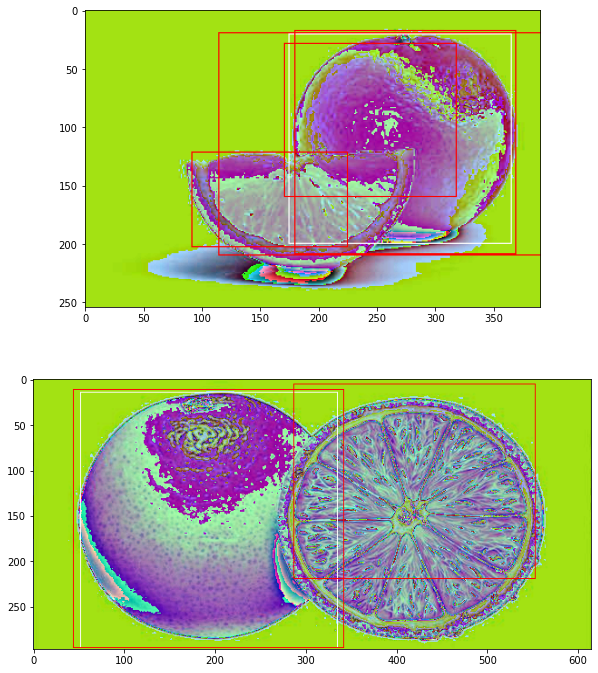

In [ ]:
fig, ax = plt.subplots(len(numbers), figsize=(10, 6 * len(numbers)))


for index, num in enumerate(numbers):
    image, labels = val_dataset[num]
    pred = model(image.unsqueeze(0).to(device))[0]
    img_to_plot = show_image(image, labels, pred)
    ax[index].imshow(img_to_plot)

# рисуем картинки с bounding box'ами

По картинкам видно, что модель хорошо предсказывает bounding box'ы, выделяя даже неразмеченные прямоугольники с фруктами, рамки лучших прямоугольников практически совпадают с заданными. Предсказанных больше, чем заранее нанесенных, думаю потому, что мы выводим все предсказанные bounding box'ы, а не оставляем только лучший.
В целом по задаче могу сказать, что в отличие от первой, здесь качество стало высоким уже после первого запуска, но вот заставить код работать было очень непросто. Много ошибок возникло из-за несовпадения входных/выходных аргументов заранее данного кода и написанного мной. Чтобы их исправить и привести данные к виду, в котором модель сможет с ними работать, пришлось переписать части кода как у себя, так и в заданных блоках. Например, в методе getitem возвращаемая картинка не подходила по размеру для модели (для каждого пикселя картинки был список из трех значений по каналам ([m, n, 3]), а требовался тензор со значениями пикселей по строкам и столбцам для разных каналов отдельно ([3, m, n])). Другая неприятная ошибка, на которую я потратила несколько часов - модель не выдавала предсказания, не считала числа. Вместо величин только nan. Код сработал только когда я добавила нормализацию после аугментаций. Для увеличения значения auc помог подсчет среднего и стандартного отклонения по каналам, подбор методов аугментаций, изменение оптимизатора. В решении пользовалась документацией по albumentations, pytorch и другим библиотекам, описанием возникших ошибок. Когда ошибки возникали при работе кода из библиотеки, приходилось много гуглить и пробовать кучу вариантов, чтобы понять, что происходит. Ссылок опять же очень много, ну вот несколько https://tproger.ru/translations/opencv-python-guide/, https://stackoverflow.com/questions/63582590/why-do-we-call-detach-before-calling-numpy-on-a-pytorch-tensor, https://forums.fast.ai/t/runtimeerror-the-size-of-tensor-a-2-must-match-the-size-of-tensor-b-96-at-non-singleton-dimension-1/37390, https://github.com/airctic/icevision/issues/234

## Бонус (10 баллов).

__Задание__. В части с классификацией добейтесь accuracy не менее 0.52. Напишите отчёт о проделанных экспериментах.

__Критерии оценки__. Оценка за бонусную часть равна 10, если вы преодолели качество 0.52 и 0 в противном случае.

__Иных оценок кроме 0 и 10 не предусмотрено__.

In [ ]:
# YOUR CODE

## Бонус (0 баллов).

__Задание 1__. Скиньте ниже смешную картинку, желательно про машинное обучение. На картинке не должно быть никаких упоминаний лектора, семинаристов и ассистентов этого курса.

__Задание 2__. Расскажите, как вам задание? Что понравилось, что не понравилось, что можно улучшить? Мы примем во внимание любой фидбек.